In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Rectangle

In [46]:
JOB_TASK_ID = "8229527-1"
filename = "../Results/probs-" + JOB_TASK_ID + ".txt"
loss_array = np.loadtxt(filename)

In [47]:
mu1_list = np.linspace(-1, 1, 21)
mu2_list = np.linspace(-1, 1, 21)
idx = np.unravel_index(np.argmin(loss_array), loss_array.shape)

mu1_list[idx[0]], mu2_list[idx[1]]

(0.40000000000000013, -0.29999999999999993)

In [48]:

i1, = np.where(np.isclose(mu1_list, 0.5))
i2, = np.where(np.isclose(mu2_list, -0.3))
ref_idx = np.array([i1, i2])

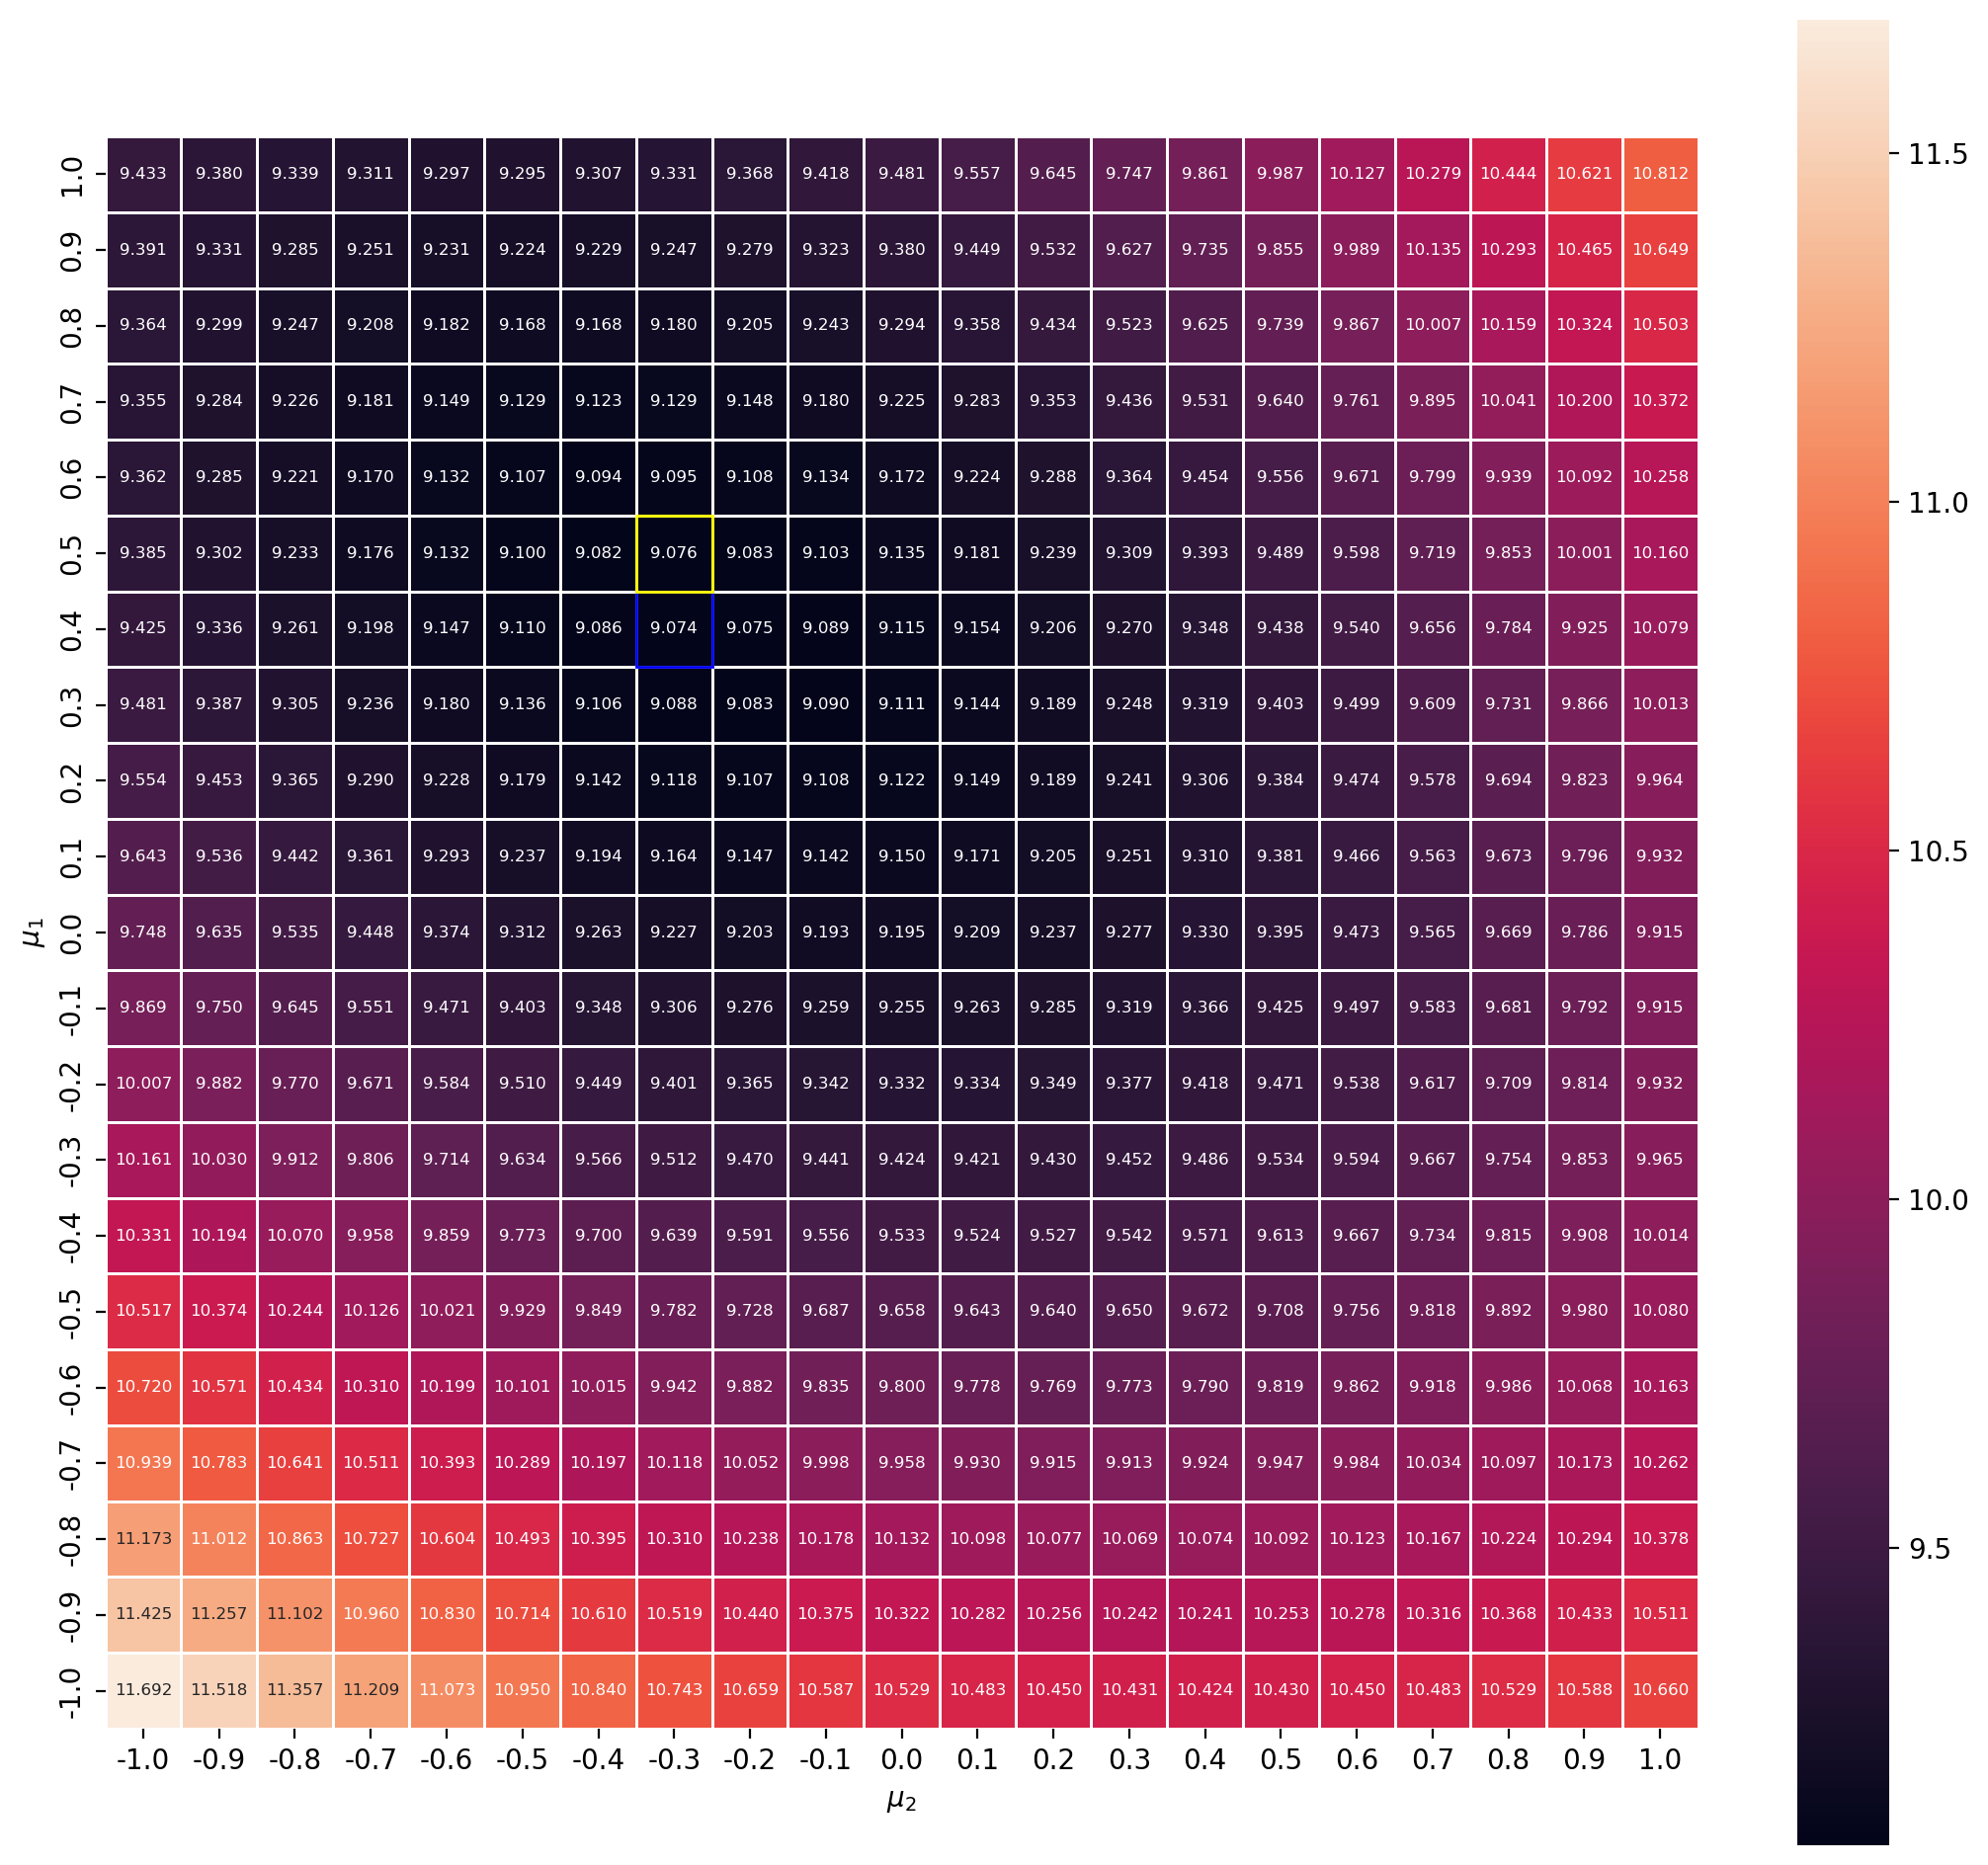

In [49]:
fig, ax = plt.subplots(figsize=(13, 12), dpi=200)

xticklabels = [f'{tick:.1f}' for tick in mu1_list]
yticklabels = [f'{tick:.1f}' for tick in mu2_list]

hm = sns.heatmap(
    loss_array,
    annot=True,
    square=True,
    fmt=".3f",
    linewidths=0.5,
    ax=ax,
    annot_kws={"fontsize": 6},
    xticklabels=xticklabels,
    yticklabels=yticklabels
)


hm.add_patch(Rectangle((idx[1], idx[0]), 1, 1, fill=False, edgecolor="blue", lw=1))
hm.add_patch(Rectangle((ref_idx[1], ref_idx[0]), 1, 1, fill=False, edgecolor="yellow", lw=1))

hm.invert_yaxis()
hm.set_xlabel("$\mu_2$", fontsize=10)
hm.set_ylabel("$\mu_1$", fontsize=10)
# hm.set_xticks(np.arange(0, 21, 5))
# hm.set_yticks(np.arange(0, 21, 5))

# hm.set_xticklabels(mu1_list[::5])
# hm.set_yticklabels(mu2_list[::5])
plt.show()
